<a href="https://colab.research.google.com/github/suhaniahujaa/NLP-Assignments/blob/main/suhani_2301201188.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 1: Character-Level NLP
**bold text**

Top 10 most common characters: [('e', 21), ('t', 20), ('a', 19), ('s', 18), ('i', 17), ('n', 16), ('o', 10), ('l', 10), ('d', 10), ('r', 9)]


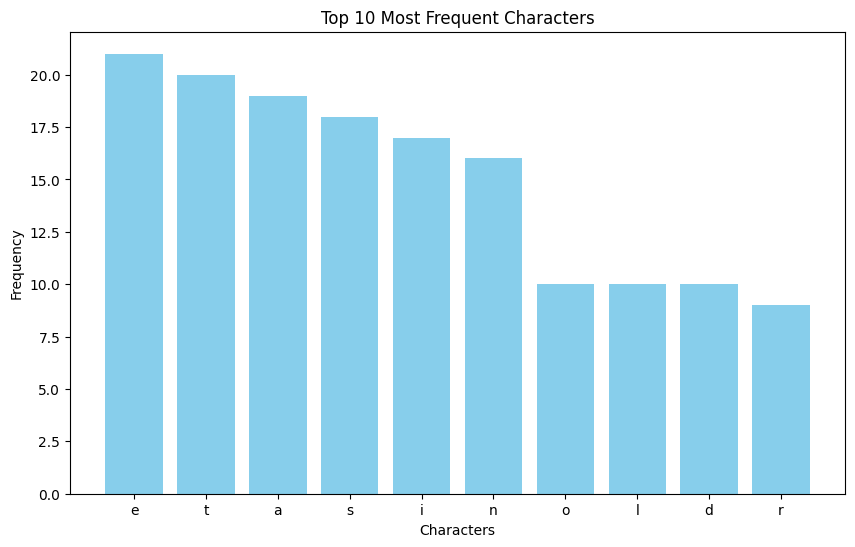

In [8]:
from collections import Counter
import matplotlib.pyplot as plt
import string

# 1. Input paragraph
text = "The quick brown fox jumps over the lazy dog. This is a classic pangram, often used to display fonts and test typewriters. NLP, a field of AI, helps machines understand human language. It is a very interesting field. Did you know that 123 is a number? Let's analyze this text."

# 2. Tokenize into characters, remove punctuation and digits
#    and count frequency
chars = [c.lower() for c in text if c.isalpha()]
freq = Counter(chars)

# 3. Print the top 10 most common characters
print("Top 10 most common characters:", freq.most_common(10))

# 4. Plot a bar chart
top_10 = freq.most_common(10)
characters = [c for c, _ in top_10]
counts = [count for _, count in top_10]

plt.figure(figsize=(10, 6))
plt.bar(characters, counts, color='skyblue')
plt.title('Top 10 Most Frequent Characters')
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.show()

Assignment 2: News Classification with TF-IDF + SVM

--- Results ---
Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

        real       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


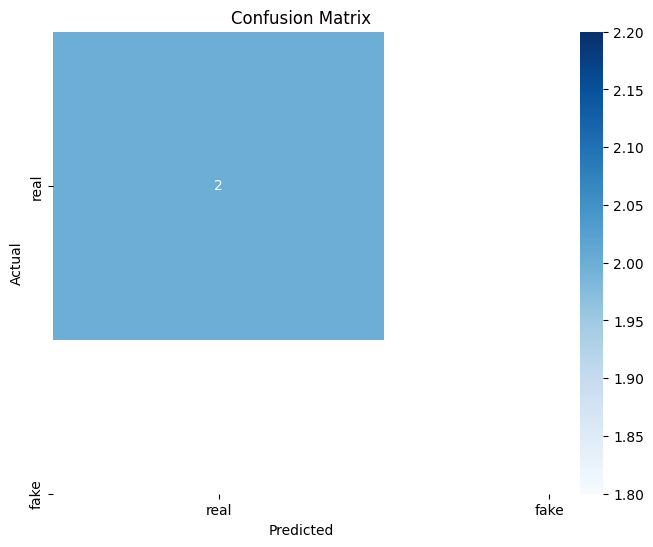

In [9]:
# The following code demonstrates a news classification task using TF-IDF and an SVM classifier.
# It uses the scikit-learn library, a popular machine learning library in Python.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset (using a small, built-in example for simplicity)
# For a "fake vs real news" dataset, you would load your own CSV file.
# Example: df = pd.read_csv('fake_real_news.csv')
# Here, we create a small, artificial dataset for demonstration purposes.
data = {
    'text': [
        "President signs new trade deal, boosting economy.",
        "Breaking news: new vaccine shows 90% effectiveness.",
        "Local man wins lottery after buying ticket at corner store.",
        "Alleged UFO sighting in rural Kansas sparks debate.",
        "Social media rumors about celebrity breakup are false.",
        "Major company announces record profits for the quarter."
    ],
    'label': [
        'real', 'real', 'real', 'fake', 'fake', 'real'
    ]
}
df = pd.DataFrame(data)

# 2. Preprocess text (a basic example)
# In a real-world scenario, you'd add more steps like:
# - Lowercasing text
# - Removing punctuation and stop words
# - Stemming or lemmatization
# For this example, we'll keep it simple as TF-IDF handles some of this.

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3, random_state=42)

# 4. Convert text into TF-IDF vectors
# TF-IDF stands for Term Frequency-Inverse Document Frequency.
# It's a numerical statistic that reflects how important a word is to a document in a collection or corpus.
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 5. Train a Support Vector Machine (SVM) classifier
# SVMs are powerful classifiers that work well in high-dimensional spaces, like those created by TF-IDF.
svm_classifier = SVC(kernel='linear') # Using a linear kernel is often effective for text classification.
svm_classifier.fit(X_train_tfidf, y_train)

# 6. Make predictions on the test set
y_pred = svm_classifier.predict(X_test_tfidf)

# 7. Print evaluation metrics
# Accuracy, confusion matrix, and classification report.
print("--- Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)

# 8. Visualize the confusion matrix for better understanding
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['real', 'fake'], yticklabels=['real', 'fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Assignment 3: Text Generation with Markov Chains


In [11]:
import random
import re
from collections import defaultdict

def preprocess_text(file_path):
    """Reads a text file and preprocesses it into a list of sentences."""
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()

    # Simple preprocessing to split by sentence-ending punctuation
    text = re.sub(r'([.!?])', r'\1 ___SENTENCE_END___', text)
    sentences = text.split('___SENTENCE_END___')

    # Clean up each sentence and add start/end tokens
    processed_sentences = []
    for s in sentences:
        s = s.strip()
        if s:
            words = re.findall(r'\b\w+\b', s.lower())
            if words:
                processed_sentences.append(['___START___'] + words + ['___END___'])
    return processed_sentences

def build_bigram_model(sentences):
    """Builds a bigram language model (Markov chain) from a list of sentences."""
    model = defaultdict(list)
    for sentence in sentences:
        for i in range(len(sentence) - 1):
            current_word = sentence[i]
            next_word = sentence[i+1]
            model[current_word].append(next_word)
    return model

def generate_sentence(model, max_length=50):
    """Generates a single sentence using the bigram model."""
    sentence = []
    current_word = '___START___'

    while True:
        # Stop if max length is reached to prevent infinite loops
        if len(sentence) >= max_length:
            break

        # Check if the current word has any follow-up words in the model
        if current_word in model:
            next_word = random.choice(model[current_word])
            if next_word == '___END___':
                break
            sentence.append(next_word)
            current_word = next_word
        else:
            # Handle cases where a word has no successors
            break

    return ' '.join(sentence).capitalize() + '.'

def main():
    # Placeholder: Create a dummy story.txt file for demonstration
    with open('story.txt', 'w') as f:
        f.write("The quick brown fox jumps over the lazy dog. A cat sat on the mat. "
                "The dog is very sleepy. A quick fox jumps. The mat is small.")

    # 1. Preprocess and build the model
    original_sentences = preprocess_text('story.txt')
    bigram_model = build_bigram_model(original_sentences)

    # 2. Generate 5 random sentences
    print("--- Generated Sentences ---")
    generated_sentences = [generate_sentence(bigram_model) for _ in range(5)]
    for i, s in enumerate(generated_sentences, 1):
        print(f"{i}. {s}")

    # 3. Compare sentence length distribution
    print("\n--- Length Comparison ---")
    original_lengths = [len(s) for s in original_sentences]
    generated_lengths = [len(s.split()) for s in generated_sentences]

    print(f"Original Sentence Lengths (words): {original_lengths}")
    print(f"Generated Sentence Lengths (words): {generated_lengths}")

    avg_original = sum(original_lengths) / len(original_lengths)
    avg_generated = sum(generated_lengths) / len(generated_lengths)

    print(f"\nAverage Original Length: {avg_original:.2f} words")
    print(f"Average Generated Length: {avg_generated:.2f} words")

if __name__ == "__main__":
    main()

--- Generated Sentences ---
1. The mat is small.
2. The lazy dog.
3. A quick fox jumps.
4. A quick brown fox jumps over the mat.
5. The lazy dog is small.

--- Length Comparison ---
Original Sentence Lengths (words): [11, 8, 7, 6, 6]
Generated Sentence Lengths (words): [4, 3, 4, 8, 5]

Average Original Length: 7.60 words
Average Generated Length: 4.80 words
